# TASK-1

In [1]:
### Data Collection
import pandas_datareader as pdr
key="0d1ba115ceb75c7e5255bc6c89bbe509c08d0e38"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import tensorflow as tf
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [4]:
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [5]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-26 00:00:00+00:00,170.57,171.47,169.68,170.80,32968167,40.546871,40.760814,40.335306,40.601546,131872668,0.0,1.0
1,AAPL,2017-12-27 00:00:00+00:00,170.60,170.78,169.71,170.10,21672062,40.554003,40.596791,40.342437,40.435146,86688248,0.0,1.0
2,AAPL,2017-12-28 00:00:00+00:00,171.08,171.85,170.48,171.00,15997739,40.668105,40.851145,40.525477,40.649088,63990956,0.0,1.0
3,AAPL,2017-12-29 00:00:00+00:00,169.23,170.59,169.22,170.52,25643711,40.228335,40.551626,40.225957,40.534986,102574844,0.0,1.0
4,AAPL,2018-01-02 00:00:00+00:00,172.26,172.30,169.26,170.16,25048048,40.948608,40.958116,40.235466,40.449409,100192192,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-12-16 00:00:00+00:00,134.51,137.65,133.73,136.685,160156900,134.51,137.65,133.73,136.685,160156900,0.0,1.0
1254,AAPL,2022-12-19 00:00:00+00:00,132.37,135.20,131.32,135.110,79592614,132.37,135.20,131.32,135.110,79592614,0.0,1.0
1255,AAPL,2022-12-20 00:00:00+00:00,132.30,133.25,129.89,131.390,77432819,132.30,133.25,129.89,131.390,77432819,0.0,1.0
1256,AAPL,2022-12-21 00:00:00+00:00,135.45,136.81,132.75,132.980,85927993,135.45,136.81,132.75,132.980,85927993,0.0,1.0
1257,AAPL,2022-12-22 00:00:00+00:00,132.23,134.56,130.30,134.352,77852108,132.23,134.56,130.30,134.352,77852108,0.0,1.0


In [7]:
fig = px.line(df, x='date', y="close",title='Apple stock')
fig.show()

In [8]:
df1=df[['date','close']]
df1.sort_values(by='date', inplace=True)
df1.set_index('date',inplace=True)
df1

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,close
date,
2017-12-26 00:00:00+00:00,170.57
2017-12-27 00:00:00+00:00,170.60
2017-12-28 00:00:00+00:00,171.08
2017-12-29 00:00:00+00:00,169.23
2018-01-02 00:00:00+00:00,172.26
...,...
2022-12-16 00:00:00+00:00,134.51
2022-12-19 00:00:00+00:00,132.37
2022-12-20 00:00:00+00:00,132.30


## Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(817, 441)

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## LSTM Model

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss=tf.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.metrics.MeanSquaredError()])

# fit
er_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=True)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks=er_cb)

Epoch 1/100
12/12 [==============================] - 9s 317ms/step - loss: 0.1298 - mean_squared_error: 0.0395 - val_loss: 0.0176 - val_mean_squared_error: 4.7411e-04
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0654 - mean_squared_error: 0.0124 - val_loss: 0.0285 - val_mean_squared_error: 0.0012
Epoch 3/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0476 - mean_squared_error: 0.0112 - val_loss: 0.0185 - val_mean_squared_error: 5.1390e-04
Epoch 4/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0388 - mean_squared_error: 0.0110 - val_loss: 0.0162 - val_mean_squared_error: 3.6992e-04
Epoch 5/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0361 - mean_squared_error: 0.0099 - val_loss: 0.0181 - val_mean_squared_error: 4.9934e-04
Epoch 6/100
12/12 [==============================] - 4s 307ms/step - loss: 0.0332 - mean_squared_error: 0.0088 - val_loss: 0.0152 - val_mean_squared_error: 3.3928e-04
Ep

In [18]:
import tensorflow as tf

In [19]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [20]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

237.41596771264813

In [22]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

157.21820643714696

## Forecast

In [23]:
import matplotlib.pyplot as plt

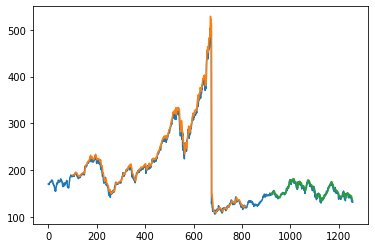

In [24]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot,)
plt.plot(testPredictPlot)
plt.show()

In [25]:
present_value=test_predict[-1][0]
present_value

136.57661

In [26]:
x_input=test_data[341:].reshape(1,-1)


In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((-1,99,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3)

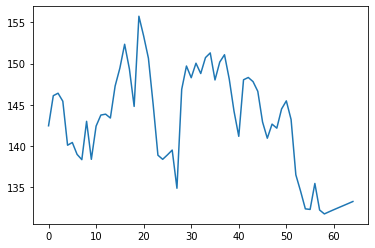

In [52]:

plt.plot(df3[1200:])

In [53]:
forecast=scaler.inverse_transform(lst_output)
forecast

array([[131.75533958],
       [132.0178921 ],
       [132.27101648],
       [132.51873593],
       [132.76466168],
       [133.01172968],
       [133.26222151]])

In [54]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):
      try:

        title = row.a.text
        date_data = row.td.text.split(' ')
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])
      except:
        pass

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,AAPL,Dec-23-22,02:15AM,Most Tech Stocks Had a Miserable Year. Not IBM.
1,AAPL,Dec-23-22,12:06AM,Apple's Australian workers go on Christmas str...
2,AAPL,Dec-23-22,12:00AM,Meta and Alphabet lose dominance over US digit...
3,AAPL,Dec-22-22,07:46PM,Peak TV is coming to an end as streaming servi...
4,AAPL,Dec-22-22,06:00PM,UPDATE 2-Apple Watches violate AliveCor patent...
...,...,...,...,...
95,AAPL,Dec-17-22,05:00AM,"Big Tech is Designing Chips Too, Should Semico..."
96,AAPL,Dec-16-22,06:13PM,Weekly Round Up
97,AAPL,Dec-16-22,04:54PM,How Apples privacy changes may impact Meta
98,AAPL,Dec-16-22,04:38PM,The No. 1 set and forget stock in tech hardwar...


In [55]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Sentiment Identification

In [56]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date


<Figure size 720x576 with 0 Axes>

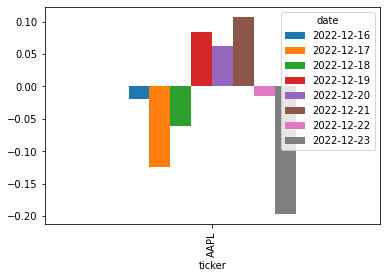

In [57]:

plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [58]:
results=mean_df.transpose()
results['sentiment']=results['AAPL'].apply(lambda x: 1 if x >0.1  else (-1 if x < 0 else 0))
results

ticker,AAPL,sentiment
date,,
2022-12-16,-0.018700,-1
2022-12-17,-0.124417,-1
2022-12-18,-0.061650,-1
2022-12-19,0.084360,0
2022-12-20,0.062486,0
2022-12-21,0.107638,1
2022-12-22,-0.014286,-1
2022-12-23,-0.197400,-1


# Inference

In [59]:
def inference(present_value,forecasted_list,results):
  increase=0
  decrease=0
  positive=0
  negative=0
  for i in forecasted_list:
    if i[0]-present_value >0:
      increase+=1
    else:
      decrease+=1 
    if increase>decrease:
      price_suggestion='invest'
    else:
      price_suggestion='may be risk'
  if results.sentiment.value_counts()[1]>results.sentiment.value_counts()[-1]:
    news_suggestion='invest'
  else:
    news_suggestion='may be risk'
  if price_suggestion==news_suggestion:
    suggestion=news_suggestion
  else:
    suggestion='may be risk'
  print('Stock investion suggestion for APPLE is',suggestion)
inference(present_value,forecast,results)  

Stock investion suggestion for APPLE is may be risk
